<center>

# **22AIE401 - Reinforcement Learning**  
# **Lab 6**  

</center>

### Team Members:
- Guruprasath M R - AIE22015  
- Rudraksh Mohanty - AIE22046  
- Shree Prasad M - AIE22050  
- Tharun Kaarthik G K - AIE22062  

---

### Objective:
To apply n-step Temporal Difference Learning in a robot rescue mission, where a robot navigates a mazelike grid environment. 
---

### Problem Statement:
Design and train a reinforcement learning agent using n-step bootstrapping to simulate a rescue robot
navigating a grid environment. The robot should learn an optimal policy to:
Reach survivors efficiently,Avoid traps, and Minimize movement cost in a dynamic, partially hostile
environment. 
---


## Original Code

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

🎓 Training complete using Q-Learning.

📘 Learned Elevator Policy:
Elevator at 0, Request at 0 -> Action: stay
Elevator at 0, Request at 1 -> Action: up
Elevator at 0, Request at 2 -> Action: up
Elevator at 0, Request at 3 -> Action: up
Elevator at 0, Request at 4 -> Action: up
Elevator at 1, Request at 0 -> Action: down
Elevator at 1, Request at 1 -> Action: stay
Elevator at 1, Request at 2 -> Action: up
Elevator at 1, Request at 3 -> Action: up
Elevator at 1, Request at 4 -> Action: up
Elevator at 2, Request at 0 -> Action: down
Elevator at 2, Request at 1 -> Action: down
Elevator at 2, Request at 2 -> Action: stay
Elevator at 2, Request at 3 -> Action: up
Elevator at 2, Request at 4 -> Action: up
Elevator at 3, Request at 0 -> Action: down
Elevator at 3, Request at 1 -> Action: down
Elevator at 3, Request at 2 -> Action: down
Elevator at 3, Request at 3 -> Action: stay
Elevator at 3, Request at 4 -> Action: up
Elevator at 4, Request at 0 -> Action: down
Elevator at 4, Request at 1 ->

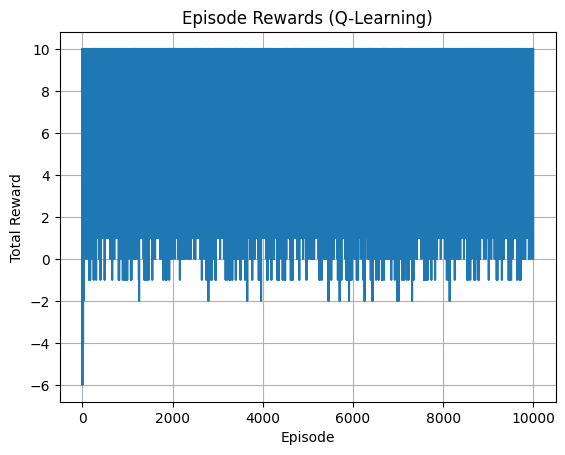

In [4]:
FLOORS = 5
ACTIONS = ['stay', 'up', 'down']
ACTION_SPACE = {0: 'stay', 1: 'up', 2: 'down'}
N_ACTIONS = len(ACTIONS)

GAMMA = 0.9    # Discount factor
ALPHA = 0.1    # Learning rate
EPSILON = 0.1  # Exploration rate
EPISODES = 10000
MAX_STEPS = 50

USE_SARSA = False  # ✅ Set to True to use SARSA; False for Q-Learning

# Initialize Q-table: Q[state][action]
Q = np.zeros((FLOORS, FLOORS, N_ACTIONS))  # [elevator floor][request floor][action]
episode_rewards = []

# Helper functions
def select_action(state):
    ef, rf = state
    if random.random() < EPSILON:
        return random.randint(0, N_ACTIONS - 1)
    return np.argmax(Q[ef][rf])

def take_action(ef, action):
    if action == 0:  # stay
        return ef
    elif action == 1:  # up
        return min(ef + 1, FLOORS - 1)
    elif action == 2:  # down
        return max(ef - 1, 0)

def get_reward(ef, rf, next_ef):
    if ef == rf and next_ef == rf:
        return 10
    elif abs(next_ef - rf) < abs(ef - rf):
        return 1
    elif abs(next_ef - rf) > abs(ef - rf):
        return -2
    elif next_ef == ef:
        return -1
    return -5

# Training loop
for ep in range(EPISODES):
    ef = random.randint(0, FLOORS - 1)  # elevator floor
    rf = random.randint(0, FLOORS - 1)  # request floor
    state = (ef, rf)
    total_reward = 0

    action = select_action(state)

    for step in range(MAX_STEPS):
        next_ef = take_action(ef, action)
        reward = get_reward(ef, rf, next_ef)
        total_reward += reward

        next_state = (next_ef, rf)
        next_action = select_action(next_state)

        if USE_SARSA:
            Q[ef][rf][action] += ALPHA * (reward + GAMMA * Q[next_ef][rf][next_action] - Q[ef][rf][action])
        else:  # Q-Learning
            Q[ef][rf][action] += ALPHA * (reward + GAMMA * np.max(Q[next_ef][rf]) - Q[ef][rf][action])

        ef = next_ef
        rf = rf  # request remains until served
        state = next_state
        action = next_action if USE_SARSA else select_action(state)

        if ef == rf:
            break  # request served

    episode_rewards.append(total_reward)

print(f"🎓 Training complete using {'SARSA' if USE_SARSA else 'Q-Learning'}.")

# Display learned policy
print("\n📘 Learned Elevator Policy:")
for ef in range(FLOORS):
    for rf in range(FLOORS):
        best_action = np.argmax(Q[ef][rf])
        print(f"Elevator at {ef}, Request at {rf} -> Action: {ACTION_SPACE[best_action]}")

# Plot learning curve
plt.plot(episode_rewards)
plt.title(f"Episode Rewards ({'SARSA' if USE_SARSA else 'Q-Learning'})")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid()
plt.show()


## Task 1

Train the elevator agent with varying exploration rates (ε = 0.05, 0.1, 0.3) and discount factors (γ = 0.5, 0.9, 0.99). Analyze how different combinations affect convergence, floor servicing efficiency, and learning stability.

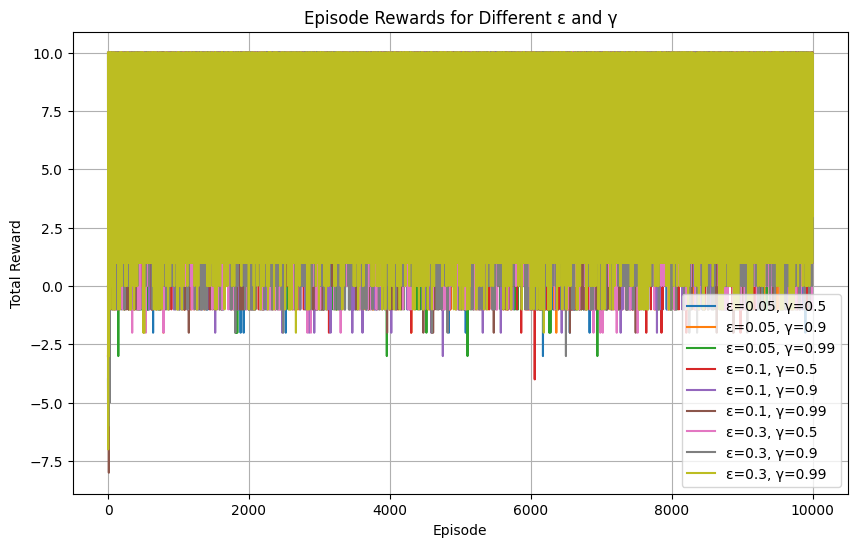

In [5]:
# Task 1: Varying ε and γ
epsilons = [0.05, 0.1, 0.3]
gammas = [0.5, 0.9, 0.99]
results = {}
for eps in epsilons:
    for gamma in gammas:
        Q = np.zeros((FLOORS, FLOORS, N_ACTIONS))
        episode_rewards = []
        for ep in range(EPISODES):
            ef = random.randint(0, FLOORS - 1)
            rf = random.randint(0, FLOORS - 1)
            state = (ef, rf)
            total_reward = 0
            action = select_action(state)
            for step in range(MAX_STEPS):
                next_ef = take_action(ef, action)
                reward = get_reward(ef, rf, next_ef)
                total_reward += reward
                next_state = (next_ef, rf)
                next_action = select_action(next_state)
                Q[ef][rf][action] += ALPHA * (reward + gamma * np.max(Q[next_ef][rf]) - Q[ef][rf][action])
                ef = next_ef
                state = next_state
                action = select_action(state)
                if ef == rf:
                    break
            episode_rewards.append(total_reward)
        results[(eps, gamma)] = episode_rewards

# Plot comparison
plt.figure(figsize=(10,6))
for key, rewards in results.items():
    plt.plot(rewards, label=f"ε={key[0]}, γ={key[1]}")
plt.title("Episode Rewards for Different ε and γ")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.show()

## Task 2

Penalize frequent direction switches and idle movement to simulate energy usage. Modify the reward structure and observe how the elevator optimizes its route to minimize unnecessary transitions.

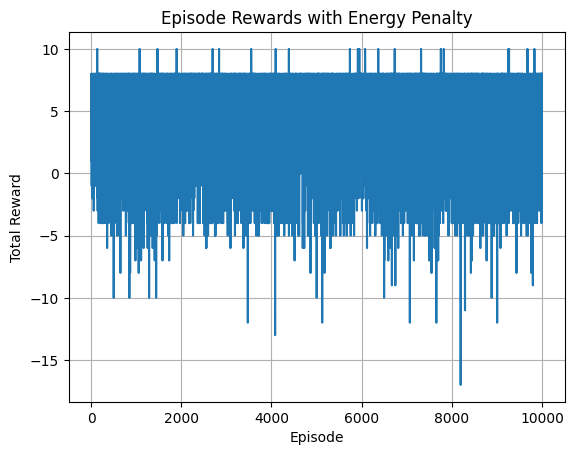

In [6]:
# Task 2: Penalize direction switches and idle movement
def get_reward_energy(ef, rf, next_ef, prev_action, action):
    reward = 0
    if ef == rf and next_ef == rf:
        reward += 10
    elif abs(next_ef - rf) < abs(ef - rf):
        reward += 1
    elif abs(next_ef - rf) > abs(ef - rf):
        reward -= 2
    elif next_ef == ef:
        reward -= 1
    else:
        reward -= 5
    # Penalize direction switch
    if prev_action is not None and action != prev_action and action in [1,2] and prev_action in [1,2]:
        reward -= 3
    # Penalize idle movement (stay)
    if action == 0:
        reward -= 2
    return reward

Q_energy = np.zeros((FLOORS, FLOORS, N_ACTIONS))
episode_rewards_energy = []
for ep in range(EPISODES):
    ef = random.randint(0, FLOORS - 1)
    rf = random.randint(0, FLOORS - 1)
    state = (ef, rf)
    total_reward = 0
    action = select_action(state)
    prev_action = None
    for step in range(MAX_STEPS):
        next_ef = take_action(ef, action)
        reward = get_reward_energy(ef, rf, next_ef, prev_action, action)
        total_reward += reward
        next_state = (next_ef, rf)
        next_action = select_action(next_state)
        Q_energy[ef][rf][action] += ALPHA * (reward + GAMMA * np.max(Q_energy[next_ef][rf]) - Q_energy[ef][rf][action])
        prev_action = action
        ef = next_ef
        state = next_state
        action = select_action(state)
        if ef == rf:
            break
    episode_rewards_energy.append(total_reward)

# Plot learning curve with energy penalty
plt.plot(episode_rewards_energy)
plt.title("Episode Rewards with Energy Penalty")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid()
plt.show()

## Task 3

Simulate time-based request patterns (e.g., peak hours from floor 0). Encode time into the state and train the agent to adapt its policy dynamically across varying demand scenarios.

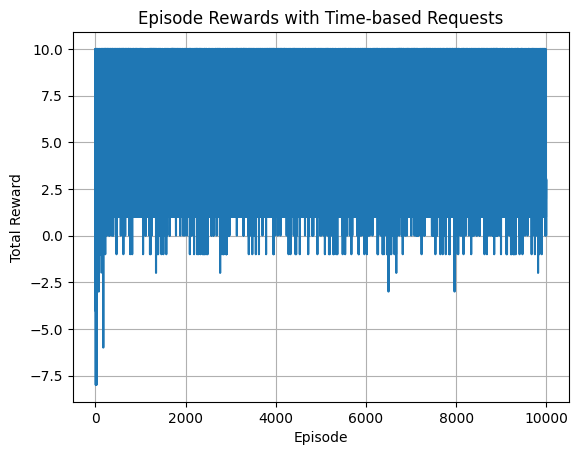

In [7]:
# Task 3: Time-based request patterns (peak hours from floor 0)
TIME_SLOTS = 4  # e.g., morning, noon, evening, night
Q_time = np.zeros((FLOORS, FLOORS, TIME_SLOTS, N_ACTIONS))
episode_rewards_time = []
def select_action_time(state):
    ef, rf, t = state
    if random.random() < EPSILON:
        return random.randint(0, N_ACTIONS - 1)
    return np.argmax(Q_time[ef][rf][t])

for ep in range(EPISODES):
    ef = random.randint(0, FLOORS - 1)
    # Simulate peak hour: more requests from floor 0 in morning (t=0)
    t = random.randint(0, TIME_SLOTS - 1)
    if t == 0 and random.random() < 0.7:
        rf = 0
    else:
        rf = random.randint(0, FLOORS - 1)
    state = (ef, rf, t)
    total_reward = 0
    action = select_action_time(state)
    for step in range(MAX_STEPS):
        next_ef = take_action(ef, action)
        reward = get_reward(ef, rf, next_ef)
        total_reward += reward
        next_state = (next_ef, rf, t)
        next_action = select_action_time(next_state)
        Q_time[ef][rf][t][action] += ALPHA * (reward + GAMMA * np.max(Q_time[next_ef][rf][t]) - Q_time[ef][rf][t][action])
        ef = next_ef
        state = next_state
        action = select_action_time(state)
        if ef == rf:
            break
    episode_rewards_time.append(total_reward)

# Plot learning curve for time-based requests
plt.plot(episode_rewards_time)
plt.title("Episode Rewards with Time-based Requests")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid()
plt.show()